<font face = "华文中宋">

# HuBMAP Competition Notebook

<font face = "华文中宋">

## Exploration 

该模块用于探索所给数据集的一些性质，服务于机器学习模型的创建。

I:\tempfiles\ipykernel_15312\2091893826.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


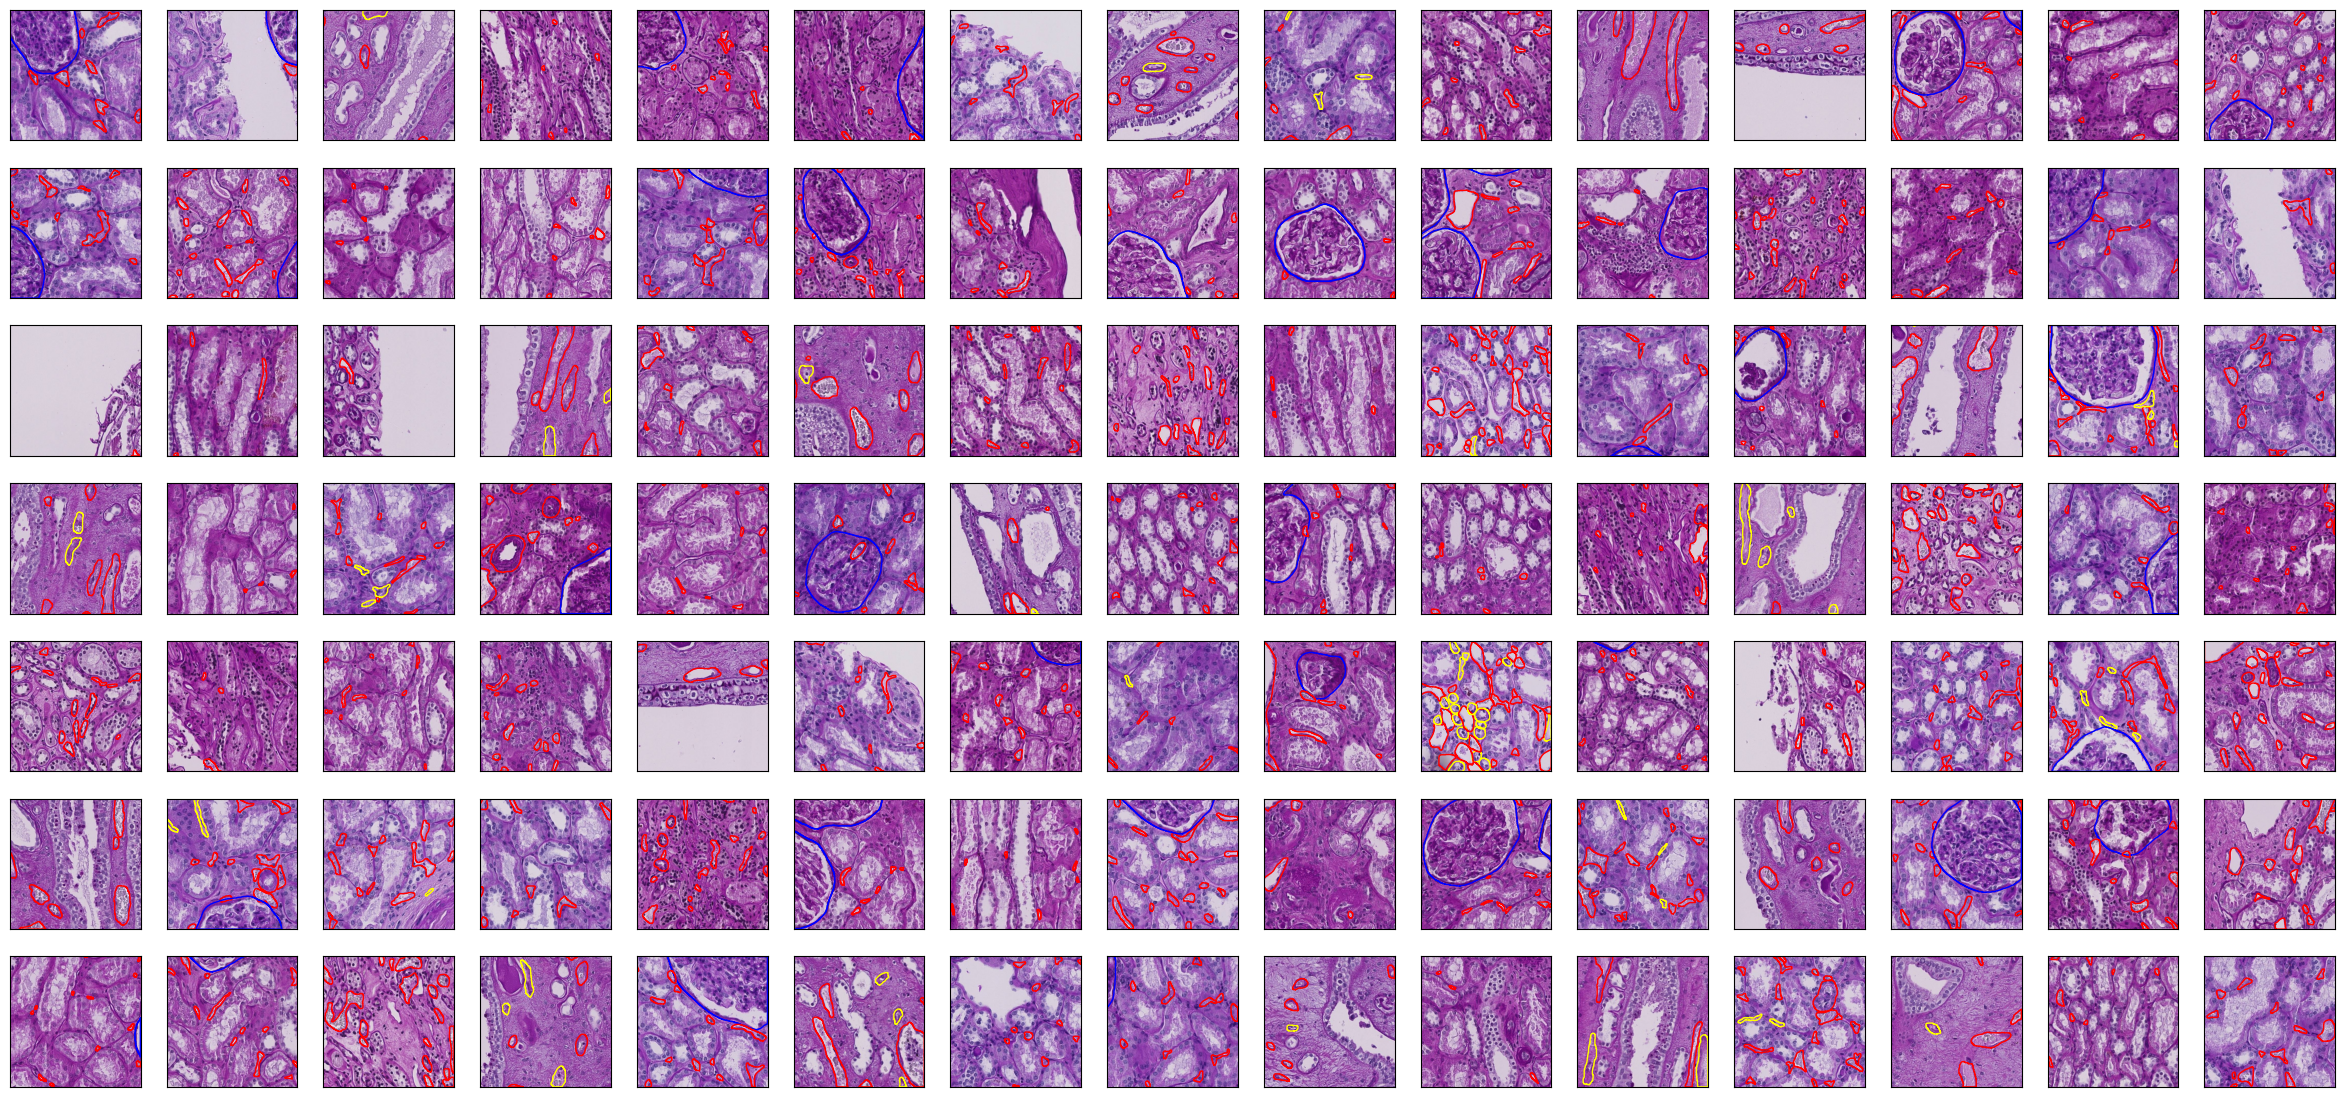

In [16]:
# 图像标注
# 方法来源：https://www.kaggle.com/competitions/hubmap-hacking-the-human-vasculature/discussion/419133
from skimage.io import imread, imshow
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json

def get_cartesian_coords(coords, img_height=512):
    coords_array = np.array(coords).squeeze()
    xs = coords_array[:, 0]
    ys = coords_array[:, 1]
    return xs, ys

with open("../data/dataset/polygons.jsonl") as f:
    data = f.read()

res = []
for file in data.splitlines():
    d = json.loads(file)
    res.append(d)

nrow, ncol = 7, 15
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(nrow*2, ncol*2))

for i in range(nrow * ncol):
    d = res[i]
    img_id = d["id"]
    path = f"../data/dataset/train/{img_id}.tif"
    img = imread(path)
    ax = axes[i//ncol][i%ncol]
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img)
    for e in d["annotations"]:
        if e["type"] == "blood_vessel":
            coordinates = e["coordinates"]
            xs, ys = get_cartesian_coords(coordinates)
            ax.plot(xs, ys, c="red", linewidth =1.0)
        if e["type"] == "glomerulus":
            coordinates = e["coordinates"]
            xs, ys = get_cartesian_coords(coordinates)
            ax.plot(xs, ys, c="blue", linewidth =1.0)
        if e["type"] == "unsure":
            coordinates = e["coordinates"]
            xs, ys = get_cartesian_coords(coordinates)
            ax.plot(xs, ys, c="yellow", linewidth =1.0)
fig.show()